Mnist Data Test Simple MLP

In [1]:
from common.Multilayer import MLP
from dataset.mnist import load_mnist
from common.optimizer import *
import time

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
x_train.shape

(60000, 784)

In [5]:
a = x_train.reshape(60000, 28, 28)
a.shape

(60000, 28, 28)

In [3]:
def train(weight_init_std, optimizer, use_batchnorm=True, activation='relu', epoch_num=3000, record=True):
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    #highper parameter
    train_size = x_train.shape[0]
    batch_size = 100
    epsilon = 1e-6

    # 1에폭당 반복 수
    iter_per_epoch = max(train_size / batch_size, 1)
    
    start = start = time.time()
    nn = MLP(input_size=784, hidden_size=[100, 50], output_size=10, activation=activation, 
             weight_init_std=weight_init_std, use_dropout=False, use_batchnorm=use_batchnorm, 
             record=record)

    for epoch in range(epoch_num):
        # get mini batch: 
        batch_mask = np.random.choice(train_size, batch_size) # shuffle 효과
        x_batch = x_train[batch_mask]
        y_batch = y_train[batch_mask]

        grads = nn.gradient(x_batch, y_batch)

        optimizer.update(nn.params, grads)
        
        # 1에폭당 정확도 계산
        if epoch % iter_per_epoch == 0:
            loss = nn.loss(x_batch, y_batch)
            train_loss_list.append(loss)
            train_acc = nn.accuracy(x_train, y_train)
            train_acc_list.append(train_acc)
            test_acc = nn.accuracy(x_test, y_test)
            test_acc_list.append(test_acc)
            print('# {0} | loss: {1:.5f} | trian acc: {2:.5f} | test acc: {3:.5f}'.format(epoch, loss, train_acc, test_acc))
        
        if epoch == epoch_num - 1:
            loss = nn.loss(x_batch, y_batch)
            train_loss_list.append(loss)
            train_acc = nn.accuracy(x_train, y_train)
            train_acc_list.append(train_acc)
            test_acc = nn.accuracy(x_test, y_test)
            test_acc_list.append(test_acc)
            print('# last | loss: {0:.5f} | trian acc: {1:.5f} | test acc: {2:.5f}'.format(loss, train_acc, test_acc))

        
    end = time.time()
    print('total time:', (end - start))
    
    return nn, (train_loss_list, train_acc_list, test_acc_list)

In [4]:
from matplotlib import animation, rc
import matplotlib.pylab as plt
rc('animation', html='html5')

def draw_animation(hist, key_act=True, subtitle='', epoch_idx=500, interval=100, figsize=(11, 4)):
    """
    epoch_idx: see epoch_idx epochs
    """
    title = 'activations' if key_act else 'dW'
    len_layer = len(hist)

    fig = plt.figure(figsize=figsize, dpi=80)
    axs = []
    axs.append(fig.add_subplot(111))
    for i in range(len_layer):
        ax = fig.add_subplot(1, len_layer, i+1)
        axs.append(ax)

    axs[0].grid(False)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_frame_on(False)

    data_list = []
    for d in hist.values():
        data_list.append(d[:epoch_idx])
    
    def ani_update(i):
        for k, ax in enumerate(axs[1:]):
            ax.clear()
            data = data_list[k][i].flatten()
            idx = k + 1 if key_act else len_layer - k
            rng = (0, 1) if key_act else (-0.25, 0.25)
            ax.hist(data, 50, range=rng)
            ax.set_title(str(idx)+"-layer", loc='center')
            ax.grid(False)
        axs[0].set_title('epoch {}: {} values {}'.format(i, title, subtitle), loc='center', fontsize=15, y=1.1)
        fig.tight_layout()
        
    anim = animation.FuncAnimation(fig, ani_update, frames=epoch_idx, interval=interval)
    plt.close()
    return anim

def get_anim_list(h_dict, key_act=True, epoch_idx=500, interval=100, figsize=(11, 4)):
    anim_list = []
    for s, x in h_dict.items():
        anim = draw_animation(x, key_act=key_act, subtitle='w_std={}'.format(s), 
                              epoch_idx=epoch_idx, interval=interval, figsize=figsize)
        anim_list.append(anim)
        
    return anim_list

def draw_loss(graph_list):
    train_loss_list, train_acc_list, test_acc_list = graph_list
    fig = plt.figure(figsize=(8, 4), dpi=80)
    ax1 = fig.add_subplot(121)
    ax1.plot(train_loss_list, 'b-', label='train_loss')
    ax1.set_title('Loss Graph')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend()
    
    ax2 = fig.add_subplot(122)
    ax2.plot(train_acc_list, 'g-', label='train_acc')
    ax2.plot(test_acc_list, 'r-', label='test_acc')
    ax2.set_title('Accuracy Graph')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

training w_std=1
# 0 | loss: 8.70458 | trian acc: 0.09997 | test acc: 0.09900
# 600 | loss: 2.33618 | trian acc: 0.24377 | test acc: 0.24660
# 1200 | loss: 1.81559 | trian acc: 0.35180 | test acc: 0.35390
# 1800 | loss: 1.82209 | trian acc: 0.42357 | test acc: 0.43200
# 2400 | loss: 1.68790 | trian acc: 0.48085 | test acc: 0.49040
# 3000 | loss: 1.62860 | trian acc: 0.52213 | test acc: 0.53190
# 3600 | loss: 1.16443 | trian acc: 0.55423 | test acc: 0.56460
# 4200 | loss: 1.22865 | trian acc: 0.58177 | test acc: 0.59350
# 4800 | loss: 0.93719 | trian acc: 0.60688 | test acc: 0.61720
# 5400 | loss: 1.05393 | trian acc: 0.62732 | test acc: 0.63680
# 6000 | loss: 1.07834 | trian acc: 0.64447 | test acc: 0.65250
# 6600 | loss: 1.10041 | trian acc: 0.65902 | test acc: 0.67120
# 7200 | loss: 0.85914 | trian acc: 0.67202 | test acc: 0.68260
# 7800 | loss: 0.92427 | trian acc: 0.68413 | test acc: 0.69580
# 8400 | loss: 1.04690 | trian acc: 0.69498 | test acc: 0.70440
# 9000 | loss: 0.80177 | tr

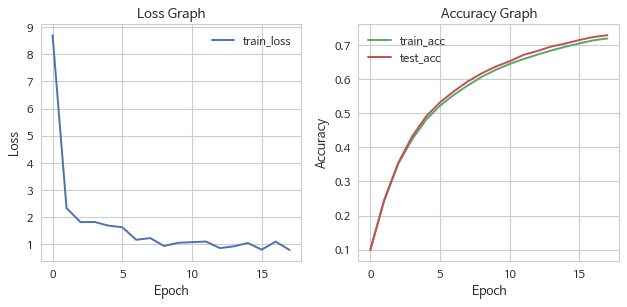

training w_std=0.01
# 0 | loss: 2.30209 | trian acc: 0.09915 | test acc: 0.10090
# 600 | loss: 2.29311 | trian acc: 0.11237 | test acc: 0.11350
# 1200 | loss: 2.30605 | trian acc: 0.11237 | test acc: 0.11350
# 1800 | loss: 2.29979 | trian acc: 0.11237 | test acc: 0.11350
# 2400 | loss: 2.28649 | trian acc: 0.11237 | test acc: 0.11350
# 3000 | loss: 2.30679 | trian acc: 0.11237 | test acc: 0.11350
# 3600 | loss: 2.30064 | trian acc: 0.11237 | test acc: 0.11350
# 4200 | loss: 2.30622 | trian acc: 0.11237 | test acc: 0.11350
# 4800 | loss: 2.29658 | trian acc: 0.11237 | test acc: 0.11350
# 5400 | loss: 2.28911 | trian acc: 0.11237 | test acc: 0.11350
# 6000 | loss: 2.29136 | trian acc: 0.11237 | test acc: 0.11350
# 6600 | loss: 2.30186 | trian acc: 0.11237 | test acc: 0.11350
# 7200 | loss: 2.30116 | trian acc: 0.10442 | test acc: 0.10280
# 7800 | loss: 2.30361 | trian acc: 0.11237 | test acc: 0.11350
# 8400 | loss: 2.31186 | trian acc: 0.11237 | test acc: 0.11350
# 9000 | loss: 2.30669 |

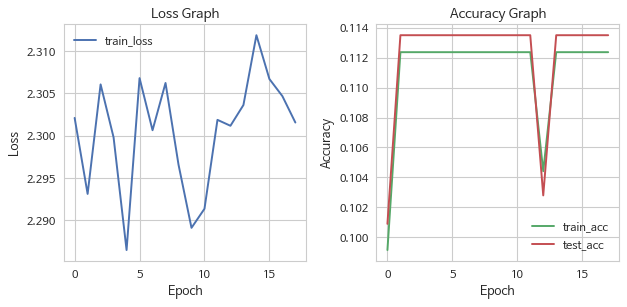

training w_std=sqrt(1/n)
# 0 | loss: 2.37931 | trian acc: 0.09752 | test acc: 0.09740
# 600 | loss: 2.26804 | trian acc: 0.12583 | test acc: 0.12660
# 1200 | loss: 2.23833 | trian acc: 0.27963 | test acc: 0.28400
# 1800 | loss: 2.21560 | trian acc: 0.36682 | test acc: 0.37200
# 2400 | loss: 2.12574 | trian acc: 0.48348 | test acc: 0.49240
# 3000 | loss: 1.98528 | trian acc: 0.55008 | test acc: 0.56480
# 3600 | loss: 1.80550 | trian acc: 0.57772 | test acc: 0.58870
# 4200 | loss: 1.63697 | trian acc: 0.62445 | test acc: 0.62940
# 4800 | loss: 1.50008 | trian acc: 0.66073 | test acc: 0.66310
# 5400 | loss: 1.24674 | trian acc: 0.69583 | test acc: 0.69980
# 6000 | loss: 1.14526 | trian acc: 0.71697 | test acc: 0.72280
# 6600 | loss: 1.01515 | trian acc: 0.74723 | test acc: 0.75160
# 7200 | loss: 1.01876 | trian acc: 0.76015 | test acc: 0.76510
# 7800 | loss: 0.89406 | trian acc: 0.78177 | test acc: 0.78550
# 8400 | loss: 0.74538 | trian acc: 0.79735 | test acc: 0.80320
# 9000 | loss: 0.82

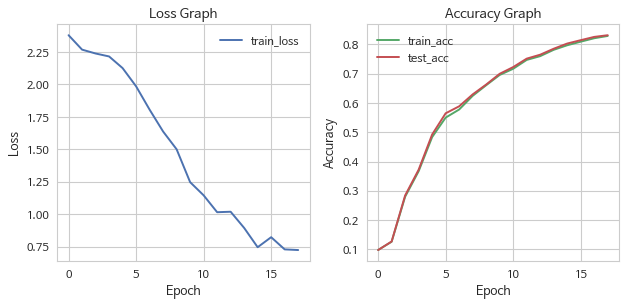

In [5]:
w_std_list = [1, 0.01, 'sigmoid']
w_std_strings = ['1', '0.01', 'sqrt(1/n)']
a_hists = {s: None for s in w_std_strings}
b_hists = {s: None for s in w_std_strings}

# optimizer = Adam(lr=0.01)
optimizer = SGD(lr=0.01)

for w_std, s in zip(w_std_list, w_std_strings):
    print('='*30)
    print('training w_std={}'.format(s))
    nn, graph_list = train(weight_init_std=w_std, optimizer=optimizer, use_batchnorm=False, 
                           activation='sigmoid', epoch_num=10000)
    a_hists[s] = nn.activation_hists
    b_hists[s] = nn.backward_hists
    draw_loss(graph_list)

In [6]:
activations_list = get_anim_list(a_hists, key_act=True, epoch_idx=200, interval=50, figsize=(8, 4))
backwards_list = get_anim_list(b_hists, key_act=False, epoch_idx=200, interval=50, figsize=(8, 4))

In [ ]:
activations_list[0]

In [ ]:
backwards_list[0]

In [ ]:
activations_list[1]

In [ ]:
backwards_list[1]

In [ ]:
activations_list[2]

In [ ]:
backwards_list[2]

batchnorm의 효과: 학습의 속도를 크게 높인다

training w_std=1
# 0 | loss: 11.17361 | trian acc: 0.09910 | test acc: 0.09930
# 600 | loss: 2.25458 | trian acc: 0.24868 | test acc: 0.25130
# 1200 | loss: 1.81340 | trian acc: 0.39788 | test acc: 0.40050
# 1800 | loss: 1.35148 | trian acc: 0.50385 | test acc: 0.50100
# 2400 | loss: 1.25397 | trian acc: 0.56782 | test acc: 0.57570
# 3000 | loss: 1.11027 | trian acc: 0.61262 | test acc: 0.62610
# 3600 | loss: 1.19383 | trian acc: 0.64703 | test acc: 0.66050
# 4200 | loss: 1.22234 | trian acc: 0.67272 | test acc: 0.68780
# 4800 | loss: 1.00112 | trian acc: 0.69313 | test acc: 0.71090
# 5400 | loss: 0.94507 | trian acc: 0.71032 | test acc: 0.72760
# 6000 | loss: 0.84292 | trian acc: 0.72540 | test acc: 0.73980
# 6600 | loss: 0.86854 | trian acc: 0.73947 | test acc: 0.75490
# 7200 | loss: 0.74301 | trian acc: 0.75125 | test acc: 0.76680
# 7800 | loss: 0.82965 | trian acc: 0.76098 | test acc: 0.77660
# 8400 | loss: 0.74679 | trian acc: 0.76855 | test acc: 0.78350
# 9000 | loss: 0.87756 | t

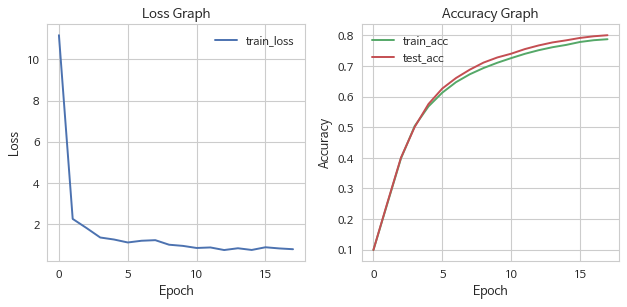

training w_std=0.01
# 0 | loss: 2.30325 | trian acc: 0.12225 | test acc: 0.12410
# 600 | loss: 1.83066 | trian acc: 0.38493 | test acc: 0.38600
# 1200 | loss: 1.68560 | trian acc: 0.43528 | test acc: 0.43980
# 1800 | loss: 1.57470 | trian acc: 0.47035 | test acc: 0.47610
# 2400 | loss: 1.45163 | trian acc: 0.48673 | test acc: 0.49770
# 3000 | loss: 1.39177 | trian acc: 0.51393 | test acc: 0.52820
# 3600 | loss: 1.31361 | trian acc: 0.53378 | test acc: 0.55030
# 4200 | loss: 1.27063 | trian acc: 0.54872 | test acc: 0.55910
# 4800 | loss: 1.22510 | trian acc: 0.56335 | test acc: 0.57740
# 5400 | loss: 1.30603 | trian acc: 0.57602 | test acc: 0.59320
# 6000 | loss: 1.03933 | trian acc: 0.59177 | test acc: 0.60440
# 6600 | loss: 1.09127 | trian acc: 0.59525 | test acc: 0.60910
# 7200 | loss: 1.07557 | trian acc: 0.61342 | test acc: 0.62790
# 7800 | loss: 1.03244 | trian acc: 0.61787 | test acc: 0.63220
# 8400 | loss: 1.04899 | trian acc: 0.62850 | test acc: 0.64190
# 9000 | loss: 1.03349 |

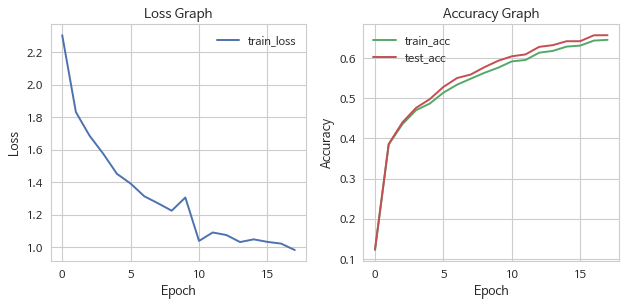

training w_std=sqrt(1/n)
# 0 | loss: 2.60369 | trian acc: 0.10297 | test acc: 0.09850
# 600 | loss: 1.35904 | trian acc: 0.70758 | test acc: 0.70810
# 1200 | loss: 1.27770 | trian acc: 0.71057 | test acc: 0.71020
# 1800 | loss: 1.04440 | trian acc: 0.72283 | test acc: 0.72250
# 2400 | loss: 0.94756 | trian acc: 0.73580 | test acc: 0.73580
# 3000 | loss: 0.87688 | trian acc: 0.75047 | test acc: 0.74740
# 3600 | loss: 0.88510 | trian acc: 0.75757 | test acc: 0.75760
# 4200 | loss: 0.79342 | trian acc: 0.77535 | test acc: 0.77440
# 4800 | loss: 0.71683 | trian acc: 0.78038 | test acc: 0.77820
# 5400 | loss: 0.69886 | trian acc: 0.78647 | test acc: 0.78720
# 6000 | loss: 0.67632 | trian acc: 0.79507 | test acc: 0.79320
# 6600 | loss: 0.61144 | trian acc: 0.79983 | test acc: 0.79900
# 7200 | loss: 0.72947 | trian acc: 0.80785 | test acc: 0.80600
# 7800 | loss: 0.63267 | trian acc: 0.81107 | test acc: 0.81200
# 8400 | loss: 0.51781 | trian acc: 0.81580 | test acc: 0.81610
# 9000 | loss: 0.59

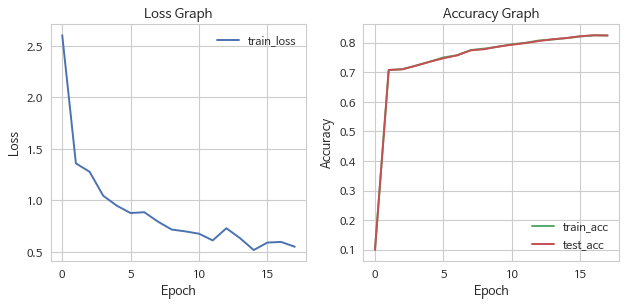

In [8]:
w_std_list = [1, 0.01, 'sigmoid']
w_std_strings = ['1', '0.01', 'sqrt(1/n)']
a_hists = {s: None for s in w_std_strings}
b_hists = {s: None for s in w_std_strings}

# optimizer = Adam(lr=0.01)
optimizer = SGD(lr=0.01)

for w_std, s in zip(w_std_list, w_std_strings):
    print('='*30)
    print('training w_std={}'.format(s))
    nn, graph_list = train(weight_init_std=w_std, optimizer=optimizer, use_batchnorm=True, 
                           activation='sigmoid', epoch_num=10000)
    a_hists[s] = nn.activation_hists
    b_hists[s] = nn.backward_hists
    draw_loss(graph_list)

training w_std=1
# 0 | loss: 13.94210 | trian acc: 0.11495 | test acc: 0.11970
# 600 | loss: 1.74761 | trian acc: 0.44423 | test acc: 0.44510
# 1200 | loss: 1.35448 | trian acc: 0.55480 | test acc: 0.55340
# 1800 | loss: 1.24701 | trian acc: 0.61098 | test acc: 0.60610
# 2400 | loss: 1.16235 | trian acc: 0.64983 | test acc: 0.64760
# 3000 | loss: 1.12660 | trian acc: 0.68290 | test acc: 0.67710
# 3600 | loss: 1.08108 | trian acc: 0.70725 | test acc: 0.70390
# 4200 | loss: 0.91972 | trian acc: 0.72523 | test acc: 0.72340
# 4800 | loss: 0.80647 | trian acc: 0.74223 | test acc: 0.74170
# 5400 | loss: 0.79361 | trian acc: 0.75637 | test acc: 0.75540
# 6000 | loss: 0.89384 | trian acc: 0.76752 | test acc: 0.76880
# 6600 | loss: 0.73776 | trian acc: 0.77670 | test acc: 0.78120
# 7200 | loss: 0.58013 | trian acc: 0.78440 | test acc: 0.78960
# 7800 | loss: 0.69365 | trian acc: 0.79363 | test acc: 0.79870
# 8400 | loss: 0.97208 | trian acc: 0.79960 | test acc: 0.80570
# 9000 | loss: 0.54362 | t

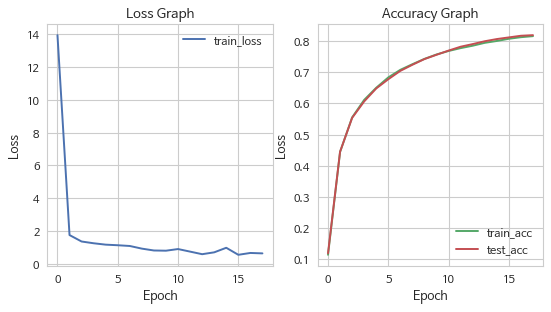

training w_std=0.01
# 0 | loss: 2.21238 | trian acc: 0.17610 | test acc: 0.18020
# 600 | loss: 1.24979 | trian acc: 0.57498 | test acc: 0.57580
# 1200 | loss: 0.99492 | trian acc: 0.65140 | test acc: 0.65560
# 1800 | loss: 0.74113 | trian acc: 0.70802 | test acc: 0.71320
# 2400 | loss: 0.80497 | trian acc: 0.74507 | test acc: 0.75290
# 3000 | loss: 0.69958 | trian acc: 0.77195 | test acc: 0.77810
# 3600 | loss: 0.56525 | trian acc: 0.79180 | test acc: 0.79680
# 4200 | loss: 0.58010 | trian acc: 0.80897 | test acc: 0.81300
# 4800 | loss: 0.42940 | trian acc: 0.82053 | test acc: 0.82580
# 5400 | loss: 0.49096 | trian acc: 0.83408 | test acc: 0.83840
# 6000 | loss: 0.47026 | trian acc: 0.84332 | test acc: 0.84530
# 6600 | loss: 0.45928 | trian acc: 0.85048 | test acc: 0.85140
# 7200 | loss: 0.58365 | trian acc: 0.85825 | test acc: 0.86100
# 7800 | loss: 0.56996 | trian acc: 0.86488 | test acc: 0.86780
# 8400 | loss: 0.36855 | trian acc: 0.86948 | test acc: 0.87200
# 9000 | loss: 0.39605 |

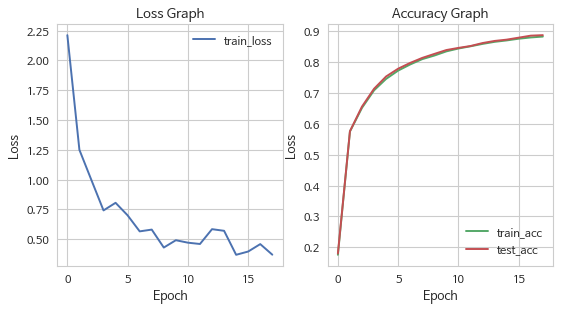

training w_std=sqrt(2/n)
# 0 | loss: 12.20148 | trian acc: 0.11977 | test acc: 0.11830
# 600 | loss: 0.57546 | trian acc: 0.86485 | test acc: 0.86930
# 1200 | loss: 0.28651 | trian acc: 0.87937 | test acc: 0.88550
# 1800 | loss: 0.33180 | trian acc: 0.89083 | test acc: 0.89420
# 2400 | loss: 0.27829 | trian acc: 0.89753 | test acc: 0.90150
# 3000 | loss: 0.23479 | trian acc: 0.90258 | test acc: 0.90540
# 3600 | loss: 0.29063 | trian acc: 0.90747 | test acc: 0.91000
# 4200 | loss: 0.37637 | trian acc: 0.91167 | test acc: 0.91420
# 4800 | loss: 0.19842 | trian acc: 0.91508 | test acc: 0.91830
# 5400 | loss: 0.20083 | trian acc: 0.91858 | test acc: 0.92240
# 6000 | loss: 0.46358 | trian acc: 0.92170 | test acc: 0.92450
# 6600 | loss: 0.16249 | trian acc: 0.92288 | test acc: 0.92530
# 7200 | loss: 0.28945 | trian acc: 0.92638 | test acc: 0.92710
# 7800 | loss: 0.25143 | trian acc: 0.92843 | test acc: 0.92920
# 8400 | loss: 0.28095 | trian acc: 0.93022 | test acc: 0.93220
# 9000 | loss: 0.3

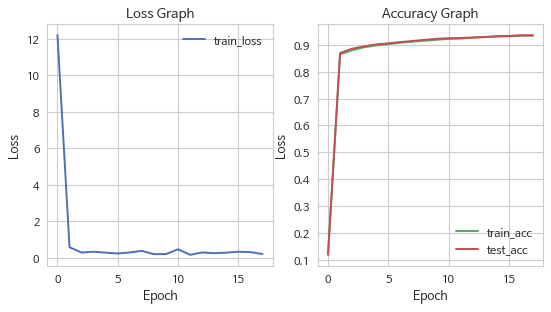

In [15]:
w_std_list = [1, 0.01, 'relu']
w_std_strings = ['1', '0.01', 'sqrt(2/n)']
a_hists = {s: None for s in w_std_strings}
b_hists = {s: None for s in w_std_strings}

# optimizer = Adam(lr=0.01)
optimizer = SGD(lr=0.01)

for w_std, s in zip(w_std_list, w_std_strings):
    print('='*30)
    print('training w_std={}'.format(s))
    nn, graph_list = train(weight_init_std=w_std, optimizer=optimizer, use_batchnorm=True, 
                           activation='relu', epoch_num=10000)
    a_hists[s] = nn.activation_hists
    b_hists[s] = nn.backward_hists
    draw_loss(graph_list)

In [18]:
activations_list2 = get_anim_list(a_hists, key_act=True, epoch_idx=200, interval=50, figsize=(8, 4))
backwards_list2 = get_anim_list(b_hists, key_act=False, epoch_idx=200, interval=50, figsize=(8, 4))

In [ ]:
activations_list2[0]

In [ ]:
backwards_list2[0]

In [ ]:
activations_list2[1]

In [ ]:
backwards_list2[1]

In [ ]:
activations_list2[2]

In [ ]:
backwards_list2[2]

Optimizer 비교

training optimizer=SGD
# 0 | loss: 11.52205 | trian acc: 0.11325 | test acc: 0.11580
# 600 | loss: 0.56515 | trian acc: 0.86250 | test acc: 0.87300
# 1200 | loss: 0.28594 | trian acc: 0.88237 | test acc: 0.89020
# 1800 | loss: 0.45556 | trian acc: 0.89398 | test acc: 0.90170
# 2400 | loss: 0.54456 | trian acc: 0.90108 | test acc: 0.90630
# 3000 | loss: 0.26511 | trian acc: 0.90555 | test acc: 0.91000
# 3600 | loss: 0.28621 | trian acc: 0.91080 | test acc: 0.91530
# 4200 | loss: 0.27879 | trian acc: 0.91488 | test acc: 0.91850
# 4800 | loss: 0.16275 | trian acc: 0.91908 | test acc: 0.92170
# 5400 | loss: 0.20606 | trian acc: 0.92078 | test acc: 0.92370
# 6000 | loss: 0.23337 | trian acc: 0.92440 | test acc: 0.92800
# 6600 | loss: 0.33015 | trian acc: 0.92597 | test acc: 0.93040
# 7200 | loss: 0.25723 | trian acc: 0.92822 | test acc: 0.93140
# 7800 | loss: 0.09889 | trian acc: 0.93033 | test acc: 0.93360
# 8400 | loss: 0.10065 | trian acc: 0.93215 | test acc: 0.93430
# 9000 | loss: 0.226

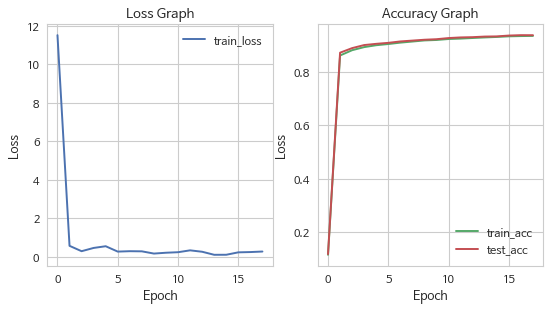

training optimizer=Adam
# 0 | loss: 7.80205 | trian acc: 0.31363 | test acc: 0.30830
# 600 | loss: 0.11910 | trian acc: 0.96600 | test acc: 0.96240
# 1200 | loss: 0.11201 | trian acc: 0.97642 | test acc: 0.96810
# 1800 | loss: 0.01250 | trian acc: 0.98035 | test acc: 0.97130
# 2400 | loss: 0.02910 | trian acc: 0.98677 | test acc: 0.97480
# 3000 | loss: 0.01999 | trian acc: 0.98878 | test acc: 0.97500
# 3600 | loss: 0.07659 | trian acc: 0.98805 | test acc: 0.97510
# 4200 | loss: 0.04415 | trian acc: 0.98957 | test acc: 0.97440
# 4800 | loss: 0.02775 | trian acc: 0.99178 | test acc: 0.97810
# 5400 | loss: 0.01226 | trian acc: 0.99203 | test acc: 0.97940
# 6000 | loss: 0.01801 | trian acc: 0.99257 | test acc: 0.97600
# 6600 | loss: 0.02885 | trian acc: 0.99388 | test acc: 0.97670
# 7200 | loss: 0.00280 | trian acc: 0.99403 | test acc: 0.97850
# 7800 | loss: 0.00279 | trian acc: 0.99565 | test acc: 0.97960
# 8400 | loss: 0.00091 | trian acc: 0.99333 | test acc: 0.97480
# 9000 | loss: 0.000

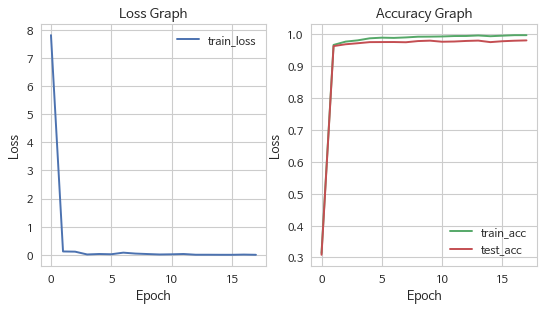

In [25]:
optimizer_list = [SGD(lr=0.01), Adam(lr=0.01)]
optimizer_strings = ['SGD', 'Adam']

for optimizer, s in zip(optimizer_list, optimizer_strings):
    print('='*30)
    print('training optimizer={}'.format(s))
    nn, graph_list = train(weight_init_std='relu', optimizer=optimizer, use_batchnorm=True, 
                           activation='relu', epoch_num=10000)
    draw_loss(graph_list)